<a href="https://colab.research.google.com/github/Ibteda-Hafiz/Google_Play_Store_Apps/blob/main/Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('googleplaystore_user_reviews.csv', encoding='latin-1')

In [ ]:
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


CLEANING THE DATASET

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
df_clean = df.dropna()

In [ ]:
print("\nDuplicate Rows:", df_clean.duplicated().sum())


Duplicate Rows: 7735


In [ ]:
df_clean = df_clean.drop_duplicates()

DATA VISUALIZATION

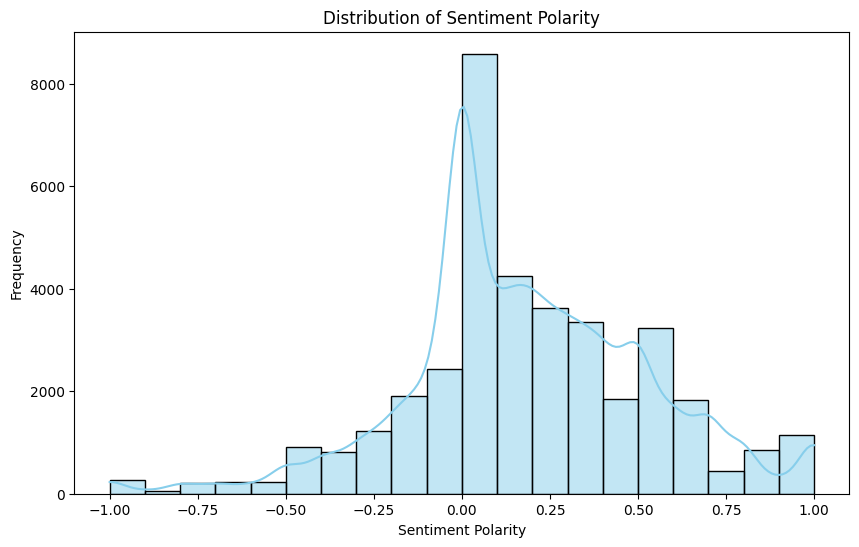

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Peak near 0: A high frequency of scores around zero means a significant number of reviews are neutral or express little strong emotion

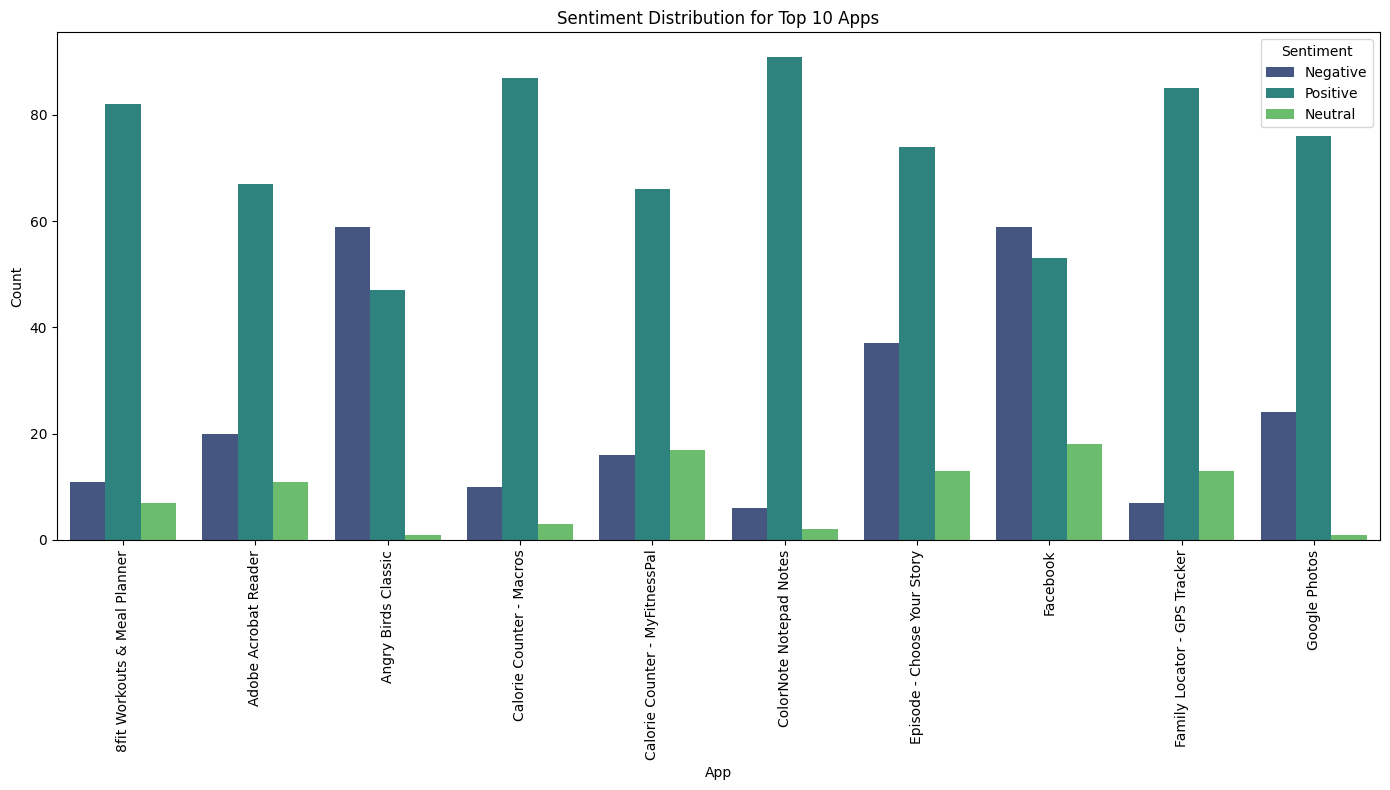

In [ ]:
# Get the top 10 apps by the number of reviews
top_apps = df_clean['App'].value_counts().nlargest(10).index
df_top_apps = df_clean[df_clean['App'].isin(top_apps)]

plt.figure(figsize=(14, 8))
sns.countplot(x='App', hue='Sentiment', data=df_top_apps, palette='viridis')
plt.title('Sentiment Distribution for Top 10 Apps')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

BY THIS WE CAN OBSERVE WHICH APP HAS WHAT KIND OF SENTIMENT RESPONSES

/tmp/ipython-input-81-4224498478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df_clean, palette='viridis')


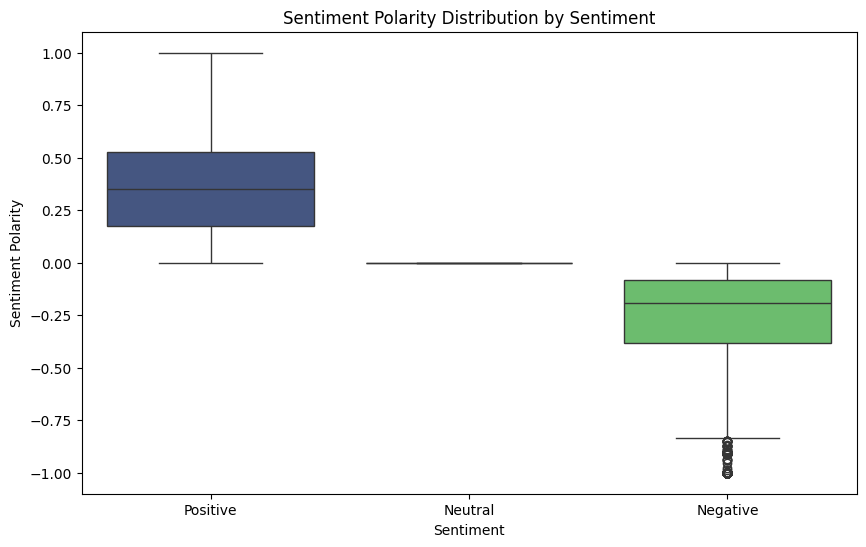

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df_clean, palette='viridis')
plt.title('Sentiment Polarity Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Polarity')
plt.show()

Distribution of Sentiment Polarity by Sentiment Category

/tmp/ipython-input-82-3264635458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Sentiment_Subjectivity', data=df_clean, palette='viridis')


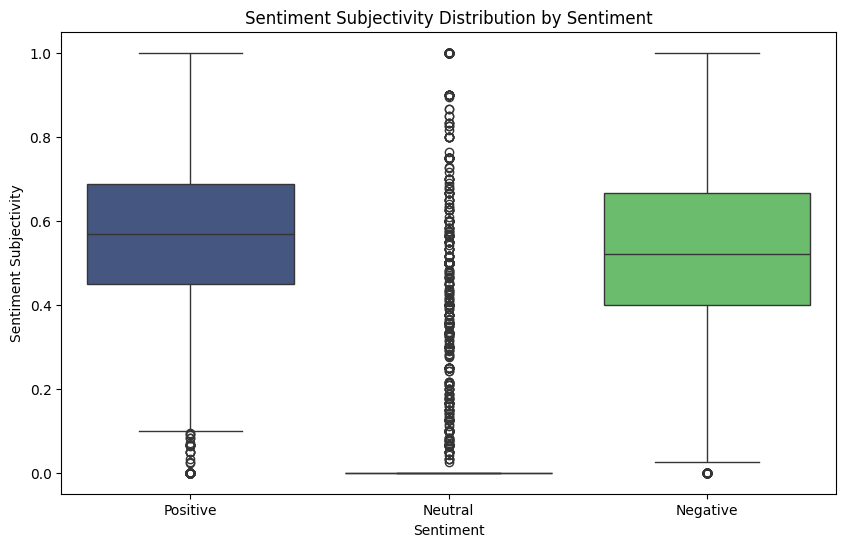

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Sentiment_Subjectivity', data=df_clean, palette='viridis')
plt.title('Sentiment Subjectivity Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Subjectivity')
plt.show()

Distribution of Sentiment Subjectivity by Sentiment Category

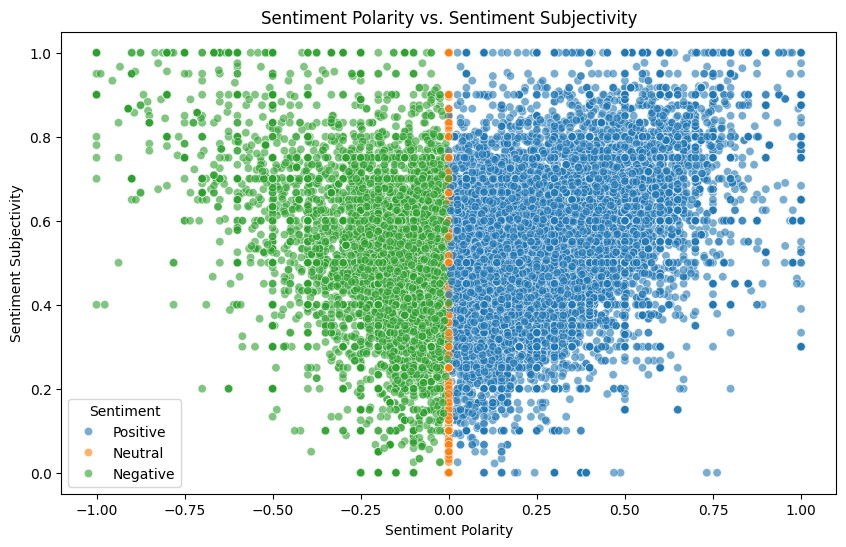

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=df_clean, hue='Sentiment', alpha=0.6)
plt.title('Sentiment Polarity vs. Sentiment Subjectivity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.show()

SENTIMENT SUBJECTIVITY VS SENTIMENT POLARITY